# Classifying Hot 100 Songs using a subsample of the Kaggle/Spotify Dataset
In this notebook, we use the subsample of the Kaggle/Spotify dataset we created in the Spotify-Kaggle Dataset Clean notebook 
and build a simple classifier (using either KNN or Random Forests) that classifies whether or not a song is part of the 
Billboard Hot 100s. Let us first load the respective packages and the datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring the data
We will first load in the following datasets:

* tracks_hot100.csv - This dataset contains a list of songs that appeared on the billboard hot 100 year end lists from 2010 to 2020.
* tracks_not100_sub.csv - This dataset contains a randomly selected sample of songs that were not part of the Hot 100s.

Both of these datasets contain the same features as we will see below

In [2]:
dt1 = pd.read_csv('tracks_hot100.csv')                # data-tables from Adnan. Modify with updated ones.    
dt2 = pd.read_csv('tracks_not100_sub.csv')            # in the tables, made hot100 as 1 and not hot100 as 0
dt = pd.concat([dt1,dt2])   
dt.head(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,main_artist,duration_min,hot100,Unnamed: 0
0,02XnQdf7sipaKBBHixz3Zp,Paparazzi,72,208307,0,['Lady Gaga'],['1HY2Jd0NmPuamShAr6KMms'],2008-01-01,0.762,0.692,...,0.11300,0.000000,0.0940,0.397,114.906,4,Lady Gaga,3.471783,True,NaN
1,285hMzLhJwHVLe9QT9qilk,Breakeven,74,261427,0,['The Script'],['3AQRLZ9PuTAozP28Skbq8V'],2008-07-14,0.630,0.696,...,0.14400,0.000000,0.0835,0.491,94.034,4,The Script,4.357117,True,NaN
2,5VGlqQANWDKJFl0MBG3sg2,Use Somebody,77,230760,0,['Kings of Leon'],['2qk9voo8llSGYcZ6xrBzKx'],2008-09-23,0.276,0.715,...,0.00552,0.000417,0.2010,0.173,137.028,4,Kings of Leon,3.846000,True,NaN
3,1GEBsLDvJGw7kviySRI6GX,You Belong With Me,74,232120,0,['Taylor Swift'],['06HL4z0CvFAxyc27GXpf02'],2008-11-11,0.687,0.745,...,0.17800,0.000016,0.1110,0.435,129.966,4,Taylor Swift,3.868667,True,NaN
4,6A5NlmBCsCGbJ27jHQgKV5,Do You Remember,50,210800,0,"['Jay Sean', 'Sean Paul', 'Lil Jon']","['4pADjHPWyrlAF0FA7joK2H', '3Isy6kedDrgPYoTS1d...",2009-01-01,0.854,0.674,...,0.02040,0.000000,0.1010,0.818,125.845,4,Jay Sean,3.513333,True,NaN
5,3SC4yUuwlSL8NvsYgo7B0M,According To You,48,200253,0,['Orianthi'],['0yNy8fi1yBBq526E6mx4Zs'],2009-01-01,0.613,0.917,...,0.02220,0.000006,0.1050,0.538,131.007,4,Orianthi,3.337550,True,NaN
6,3iL2l5gUqyPS6vDwJFgJTR,BedRock,74,288133,1,"['Young Money', 'Lloyd']","['5OrB6Jhhrl9y2PK0pSV4VP', '1Xfmvd48oOhEWkscWy...",2009-01-01,0.733,0.664,...,0.10200,0.000000,0.1910,0.557,148.005,4,Young Money,4.802217,True,NaN
7,0MLX5HfrTW59Mau7UZ8wCP,Down,52,212520,0,"['Jay Sean', 'Lil Wayne']","['4pADjHPWyrlAF0FA7joK2H', '55Aa2cqylxrFIXC767...",2009-01-01,0.658,0.688,...,0.01060,0.000000,0.0791,0.689,66.001,4,Jay Sean,3.542000,True,NaN
8,1Fo2N5iXRi37maMboaig7O,Undo It,60,177253,0,['Carrie Underwood'],['4xFUf1FHVy696Q1JQZMTRj'],2009-01-01,0.476,0.840,...,0.11000,0.000000,0.0460,0.648,156.254,4,Carrie Underwood,2.954217,True,NaN
9,1YaVmBh7EAeR54FIjuFcb5,Naturally,66,202587,0,['Selena Gomez & The Scene'],['6dJeKm76NjfXBNTpHmOhfO'],2009-01-01,0.605,0.902,...,0.01850,0.000001,0.0534,0.875,132.612,4,Selena Gomez & The Scene,3.376450,True,NaN


# Exploring the Features
The features we are most interested in are:

* Explicit: Whether or not a song has explicit content
* Danceability: A measure (from 0 to 1) of a song's danceability with 1 being most danceable
* Energy: A measure (from 0 to 1) of a song's intensity and activity
* Loudness: Overall loudness of a song in dB
* Speechiness: The presence of words in a track (closer to 1 means more spoken words)
* Instrumentalness: Measure of lack of vocals
* Acousticness: The degree of acousticness in a track
* Tempo: Overall Estimated Tempo of a track (in BPM)
* Valence: Measure of musical positiveness in a track
* Time Signature: Estimated overall time signature of a track
* Duration in Minutes

Let's first look at how these features compare across Hot100 and Not100 songs by means of histograms!

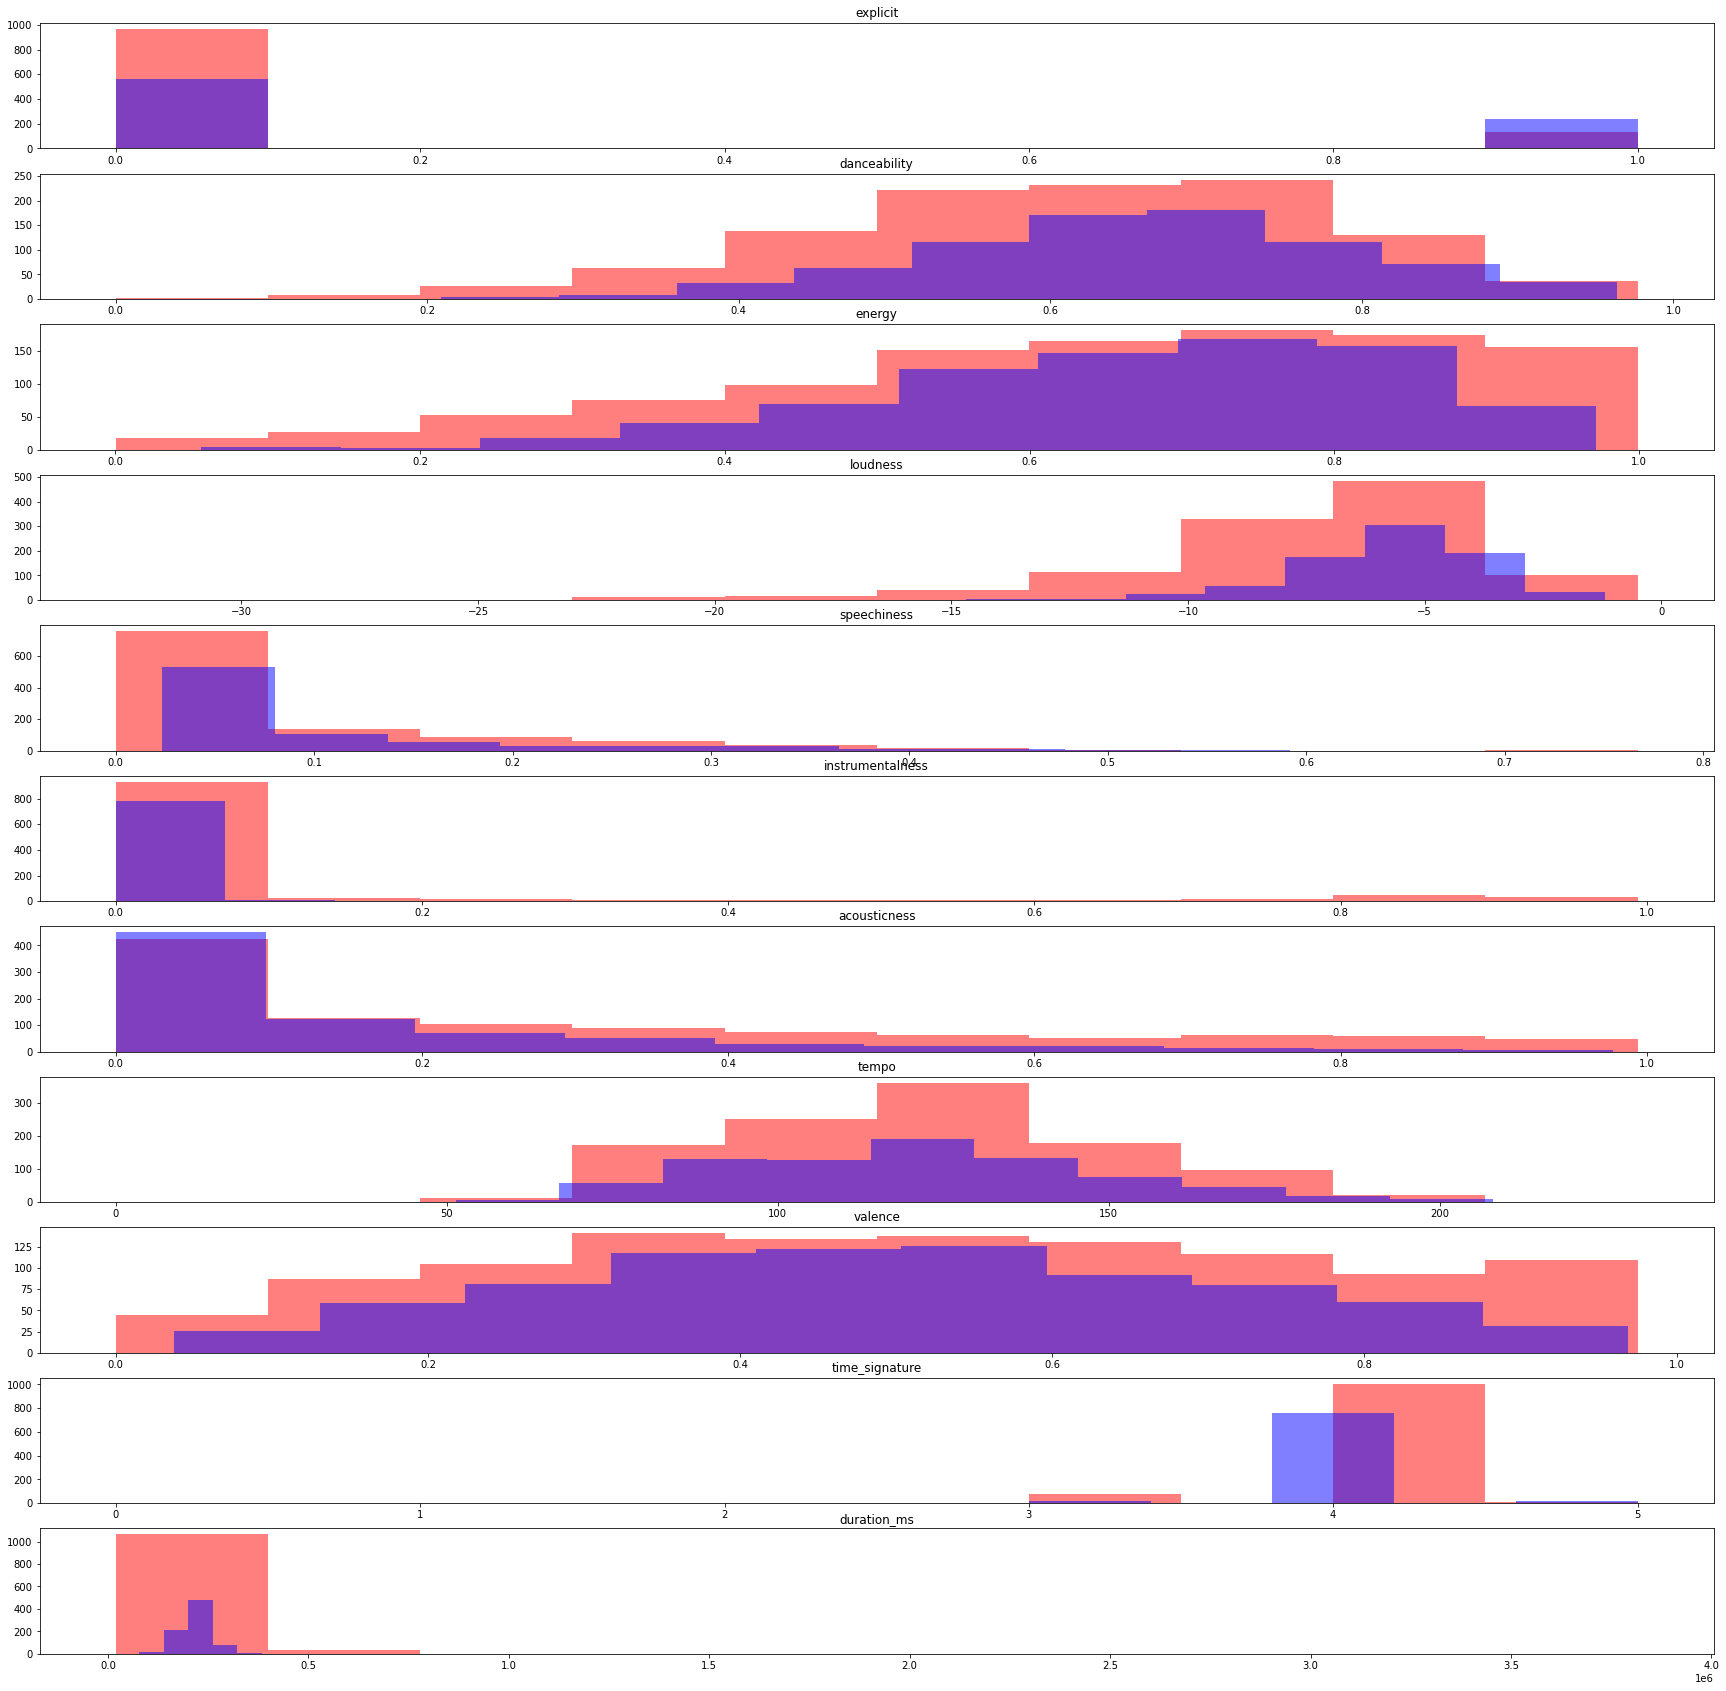

In [3]:
# List of all features
features = ['explicit','danceability','energy','loudness','speechiness','instrumentalness','acousticness','tempo','valence','time_signature','duration_ms']

# Making the boxplot
# tracks.boxplot(column=features, by='hot100',layout=(4,3), figsize=(10,10), sharey=False)
fig, ax = plt.subplots(len(features),1, figsize = (30, 30))
for i in range(len(features)):
    data0 = dt.loc[dt['hot100'] == 0, features[i]]
    data1 = dt.loc[dt['hot100'] == 1, features[i]]
    ax[i].hist(data0, label = 'Not', color='red', alpha = 0.5)
    ax[i].hist(data1, label = 'Hot', color='blue', alpha = 0.5)
    ax[i].set_title(features[i])

plt.show()

# Classification with RF 
Let's try and build a RF classifier. To do this, we are going to be focusing on two things:

* First, we will re-scale all input features to z-score
* Second, we will do grid-search and K cross validation to find best hyperparameter (number of trees, fraction of features to be split) 
* Third, we will use feature importance function to find the features that are prominent in classification.
* Last, we will fit the model with those features

In [4]:
# Got to import the relevant packages first
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.base import clone
from sklearn.metrics import plot_confusion_matrix, accuracy_score

In [5]:
# This function is to scale input features (stored in in_feats list) into a z-score by making a transformer. 
def encode_data(dt, response, in_feats):   # This function 
    sc_index = [dt.columns.get_loc(col) for col in in_feats]      # get index of columns of input features
    sc = StandardScaler()                                         # define a standard scaler transformation (z-score)
    ct = make_column_transformer((sc, sc_index))                  # Make transformer to convert features to z-score
    ct.fit_transform(dt)                                          # series of fitting and transform steps
    dt2 = ct.transform(dt)
    dt2 = pd.DataFrame(dt2)
    dt2.columns = in_feats                                        # Add column names from the in_feats 
    dt2['hot100'] = np.array(dt['hot100'])                        # Add response column to the data (hot100 or not)
    return dt2

In [6]:
# This function splits the df dataframe into training set of fraction 1-test_size and testing set of fraction test_size
def split_data_random(df, test_size):
    df = df.copy()
    df = shuffle(df)
    head = int((1 - test_size) * len(df))                    
    tail = len(df) - head
    df_train = df.head(head).reset_index(drop=True)        # here we are splitting the dataframe
    df_test = df.tail(tail).reset_index(drop=True)
    return df_train, df_test

In [7]:
# make separate variables for input features (X) and response (y)
def split_Xy(df,response,in_feats):
    colnames = list(df)
    X = np.array(df[in_feats])
    y = np.array(df[response])
    y = y.ravel()
    return X, y

In [8]:
# We are performing grid-search over hyperparameter space. For each ML model, we have considered two hyperparameters.
# hp1 is dictionary of first hyperparameter and hp2 is for the second
def grid_search_cls(model):
    models = []
    hp1 = {'RF': [70, 100, 150, 200, 250]}   # This is number of K that is, nearest neighbors
    hp2 = {'RF': ['auto', 0.3, 0.5, 0.7, 1.0]}      # this is whether we take weighted mean or simple mean in K nearest neighbors
    
    for n in hp1[model]:     # in this nested for loops, we are defining ML models with the above mentioned hyperparameters
        for m in hp2[model]:
            models.append(('RF_{}_{}'.format(n, m), RandomForestClassifier(random_state=5,n_estimators=n, max_features=m)))
    return models            # this function returns all the ML models that we will be testing

In [9]:
# Here we compare performance of the various ML models using K cross validation.  K is set by variable CV
def compare_models(df, models, cv, replicas, response, in_feats):  
    scoring = 'accuracy'
    # ---------------------------------
    results = pd.DataFrame()
    for i in range(replicas):      # we test each model "replicas" number of times. Stochastic models like RF require this
        X_train, y_train = split_Xy(df,response,in_feats)  # find X and y of training dataset
        temp = []
        for name, model in models:   # models are tuples of two values: name and model_specifications
            # cross_validation being done here. cv: number of slices we create of the dataset (selected 5)
            # scoring: performance metric (accuracy for classification)
            # model: which ML model to test
            cv_results = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring) 
            cv_results = np.mean(cv_results)    # Take mean of the cross_validation results
            temp.append(cv_results)             # Append to the list "temp"
        if i == 0:
            results = pd.DataFrame(temp)
        else:
            results = pd.concat([results, pd.DataFrame(temp)], axis=1, ignore_index=True)  # make dataframe of teh results
    results['mean'] = results.mean(axis=1)   # average over all replicas. 
    results['std'] = results.std(axis=1)
    # ---------------------------------
    _names, _models = [], []
    for name, model in models:       # models is a tuple. 
        _names.append(name)
        _models.append(model)
    results['name'] = pd.Series(_names)
    results['model'] = pd.Series(_models)
    # ---------------------------------
    id_best = results['mean'].idxmax()    # find the model which has highest accuracy. 
    best = results.loc[id_best, 'model']   # return the model with highest accuracy.
    return results, best

In [10]:
# Here we make the confusion matrix of our results for test dataset. 
def confusion_matrix(estimator, _X_test, _y_test, response, normalize):
    # ---------------------------------
    fig, ax = plt.subplots(1, figsize=(12, 12))          # define subplots
    plt.rcParams.update({'font.size': 18})
    colors = {'true': 'Blues', 'pred': 'Reds', 'all': 'Greens', 'none': 'Greys'}    # define colors
    if normalize == 'none':
        plot_confusion_matrix(estimator, _X_test, _y_test,
                              cmap=colors[normalize], values_format='.0f', xticks_rotation='vertical', ax=ax) 
        #plot_confusion_matrix is in-build function.
    else:
        plot_confusion_matrix(estimator, _X_test, _y_test, normalize=normalize,
                              cmap=colors[normalize], values_format='.3f', xticks_rotation='vertical', ax=ax)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)                             # plot characteristics defined here
    plt.xlabel('Predicted label', fontsize=21)
    plt.ylabel('True label', fontsize=21)
    if normalize == 'true':
        metric = 'Recall'
    elif normalize == 'pred':
        metric = 'Precision'
    elif normalize == 'all':
        metric = 'Confusion matrix (normalized)'
    else:
        metric = 'Confusion matrix'
    plt.title('{}'.format(metric), fontsize=25)
    plt.tight_layout()
    plt.savefig('confMatrixTestRandom_{}.png'.format(normalize))          # save figures as png
    plt.close()    

In [11]:
################################################################################################
############ After defining all the functions, here we run the code ############################
param = dict(groupDist=50, test_size=0.25, scoring='accuracy', cv=5, replicas=2) # some 
gridsearchCls = True                     ## we want to do grid-search so true here
        
# below are all input features.. removed 'popularity' below
in_feats = ['danceability','energy','key','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']
response = ['hot100']    # feature to be classified
dt = encode_data(dt,response,in_feats)     # transform input features to z-score. Returns the dataframe. Print dataframe to see how features get changed
dt_train, dt_test = split_data_random(dt, param['test_size'])  # split data into training and testing sets
X, y = split_Xy(dt,response,in_feats)       # find X (input) and y (output)



In [12]:
if gridsearchCls:   # perform grid search to find best model
    best_models = {}      # for each ML algorithm, best model will be stored here
    df_scores = pd.DataFrame()
    for algorithm in ['RF']:    # testing these ML algorthms
        print(algorithm)
        algorithms = grid_search_cls(algorithm)   # here we are defining hyperparameters for doing grid-search.
        # refer back to grid_search_cls
        scores, best = compare_models(dt, algorithms, param['cv'], param['replicas'],response,in_feats) # comparing models for each ML model
        best_models[algorithm] = best     # store the best model of an algorithm here. 
        df_scores['{}_mean'.format(algorithm)] = scores['mean'] # store the mean accuracy of the model here
        df_scores['{}_std'.format(algorithm)] = scores['std']
        printOut = pd.DataFrame(algorithms)  
        printOut['mean'], printOut['std'] = scores['mean'], scores['std']   # to write accuracy results in Excel
        printOut.to_excel('gridsearch_{}.xlsx'.format(algorithm),sheet_name='{}'.format(algorithm),index=False)
#        excel_output(printOut, root=root, file_name='{}'.format(algorithm), csv=False)
#        compare_models_plot(df_scores, target[1])
    models_cls = [('RF', best_models['RF'])]
else:
    models_cls = [('RF', RandomForestClassifier(random_state=5))]


RF


In [13]:
# comparing different models. Now out of MLP, SVM, etc. which one is the best. We check this here. 

scores_cls, _best_cls = compare_models(dt, models_cls,param['cv'], param['replicas'],response,in_feats) 
# again using compare_models but now using the optimum hyperparameters of each ML model

# confusion matrix
training_cls, testing_cls = split_data_random(dt, param['test_size'])  # now use the best model to train and test. 
X_train, y_train = split_Xy(training_cls, response, in_feats)
_best_cls.fit(X_train, y_train)

X_test, y_test = split_Xy(testing_cls, response, in_feats)
confusion_matrix(_best_cls, X_test, y_test, response, 'true')
confusion_matrix(_best_cls, X_test, y_test, response, 'pred')
confusion_matrix(_best_cls, X_test, y_test, response, 'all')
confusion_matrix(_best_cls, X_test, y_test, response, 'none')